source: https://www.kaggle.com/code/yassinesedjari/amazon-reviews-bidirectional-lstm

1 negative

2 positive

In [73]:
# importing libraries
import pandas as pd
import numpy as np
import nltk #change
nltk.download('stopwords') #change
nltk.download('wordnet') #change
nltk.download('punkt') #change
import tensorflow as tf #change
!pip install tensorflow
from tensorflow.keras.models import Sequential #change
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense #change
from tensorflow.keras.utils import plot_model #change
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
!pip install emoji #change
import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
#from keras.layers.embeddings import Embedding
#updated below
from tensorflow.keras.layers import Embedding #change
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
df = pd.read_csv("test.csv")
df.head()

,sentiment,review title,review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [75]:
df = df[["sentiment", "review"]]
df

,sentiment,review
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,1,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...
...,...,...
1994,2,this will help you to under stand life and you...
1995,2,"Love this book, it's the first time in my life..."
1996,2,I'm naturally a huge fan of Jeff Corwin and hi...
1997,2,Jeff Corwin is an amazing man who has many adv...


In [76]:
#replacing 1(negative) with 0
df = df.replace(1, 0)
df

,sentiment,review
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,0,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...
...,...,...
1994,2,this will help you to under stand life and you...
1995,2,"Love this book, it's the first time in my life..."
1996,2,I'm naturally a huge fan of Jeff Corwin and hi...
1997,2,Jeff Corwin is an amazing man who has many adv...


In [77]:
#replacing 2(positive) with 1
df = df.replace(2, 1)
df

,sentiment,review
0,1,My lovely Pat has one of the GREAT voices of h...
1,1,Despite the fact that I have only played a sma...
2,0,I bought this charger in Jul 2003 and it worke...
3,1,Check out Maha Energy's website. Their Powerex...
4,1,Reviewed quite a bit of the combo players and ...
...,...,...
1994,1,this will help you to under stand life and you...
1995,1,"Love this book, it's the first time in my life..."
1996,1,I'm naturally a huge fan of Jeff Corwin and hi...
1997,1,Jeff Corwin is an amazing man who has many adv...


In [78]:
#print shape of data
print(f"Data consists of {df.shape[0]} rows and {df.shape[1]} columns.")

Data consists of 1999 rows and 2 columns.


In [79]:
#check null
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [80]:
#drop of null
df = df.dropna()

In [81]:
#check duplicate
df.duplicated().sum()

0

In [82]:
df1 = df
df1.shape

(1999, 2)

In [83]:
df1.sentiment.value_counts()

1    1045
0     954
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Countplot for Sentiment Labels')

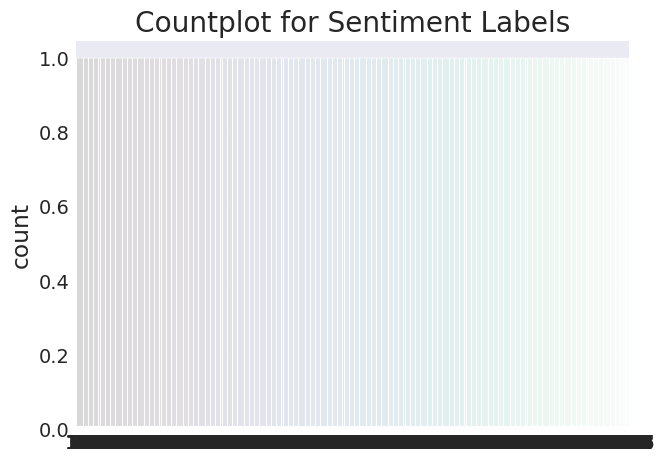

In [84]:
#fix
sns.countplot(df1.sentiment,palette="mako")
plt.title("Countplot for Sentiment Labels")

#Cleaning data

In [85]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(df1,"review")

,sentiment,review
0,1,my lovely pat has one of the great voices of h...
1,1,despite the fact that i have only played a sma...
2,0,i bought this charger in jul and it worke...
3,1,check out maha energy's website their powerex...
4,1,reviewed quite a bit of the combo players and ...
...,...,...
1994,1,this will help you to under stand life and you...
1995,1,"love this book, it's the first time in my life..."
1996,1,i'm naturally a huge fan of jeff corwin and hi...
1997,1,jeff corwin is an amazing man who has many adv...


In [86]:
# applying lemmatizer to remove tenses from texts
lemmatizer = WordNetLemmatizer()
i=0
def preprocess_text(text):
    global i
    if i%100==0:
        print(i)
    i+=1
    #removing contractions
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    #removing non alphanumeric char
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    #func to remove emojis
    def remove_emojis(text):
      emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
      return emoji_pattern.sub(r'', text)

    #remove emojis
    text = remove_emojis(text)
    #lemmatizing and removing stopwords
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)

    return text

df1["clean_review"] = df1["review"].apply(preprocess_text)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [87]:
df.head(15)

,sentiment,review,clean_review
0,1,my lovely pat has one of the great voices of h...,lovely pat one great voice generation listened...
1,1,despite the fact that i have only played a sma...,despite fact played small portion game music h...
2,0,i bought this charger in jul and it worke...,bought charger jul worked ok design nice conve...
3,1,check out maha energy's website their powerex...,check maha energy website powerex mh c f charg...
4,1,reviewed quite a bit of the combo players and ...,reviewed quite bit combo player hesitant due u...
5,0,i also began having the incorrect disc problem...,also began incorrect disc problem read vcr sti...
6,0,"i love the style of this, but after a couple y...",love style couple year dvd giving problem even...
7,0,i cannot scroll through a dvd menu that is set...,cannot scroll dvd menu set vertically triangle...
8,1,"exotic tales of the orient from the 's ""d...",exotic tale orient dr shen fu weird tale magaz...
9,0,"firstly,i enjoyed the format and tone of the b...",firstly enjoyed format tone book author addres...


Text(0, 0.5, 'Text Length')

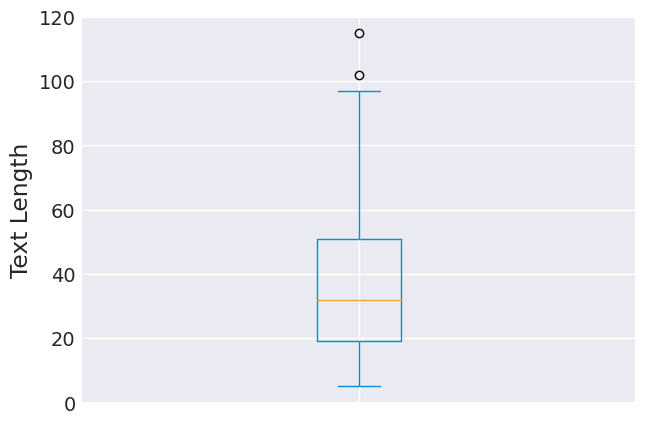

In [88]:
text_length = pd.Series([len(review.split()) for review in df1["clean_review"]])
text_length.plot(kind="box")
plt.ylabel("Text Length")

Text(0, 0.5, 'Frequency')

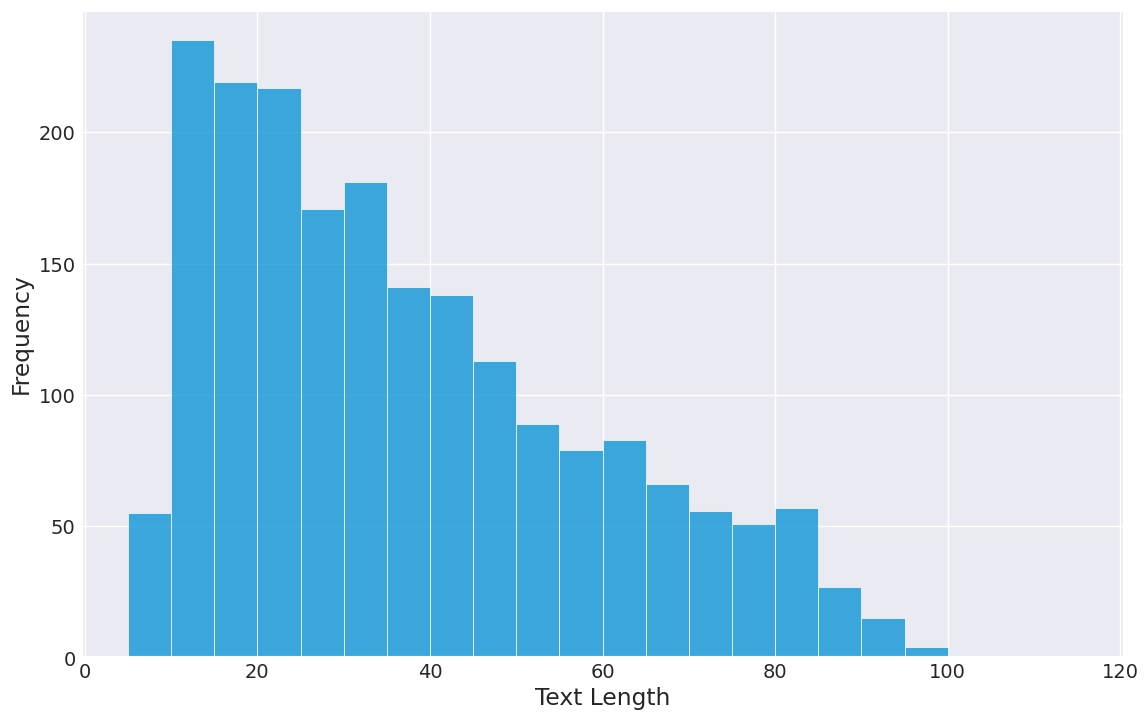

In [89]:
plt.figure(figsize=(12,8))
sns.histplot(text_length,palette="deep")
plt.xlabel("Text Length")
plt.ylabel("Frequency")

# WordClouds
- useful for viewing and analyzing words that are frequently used

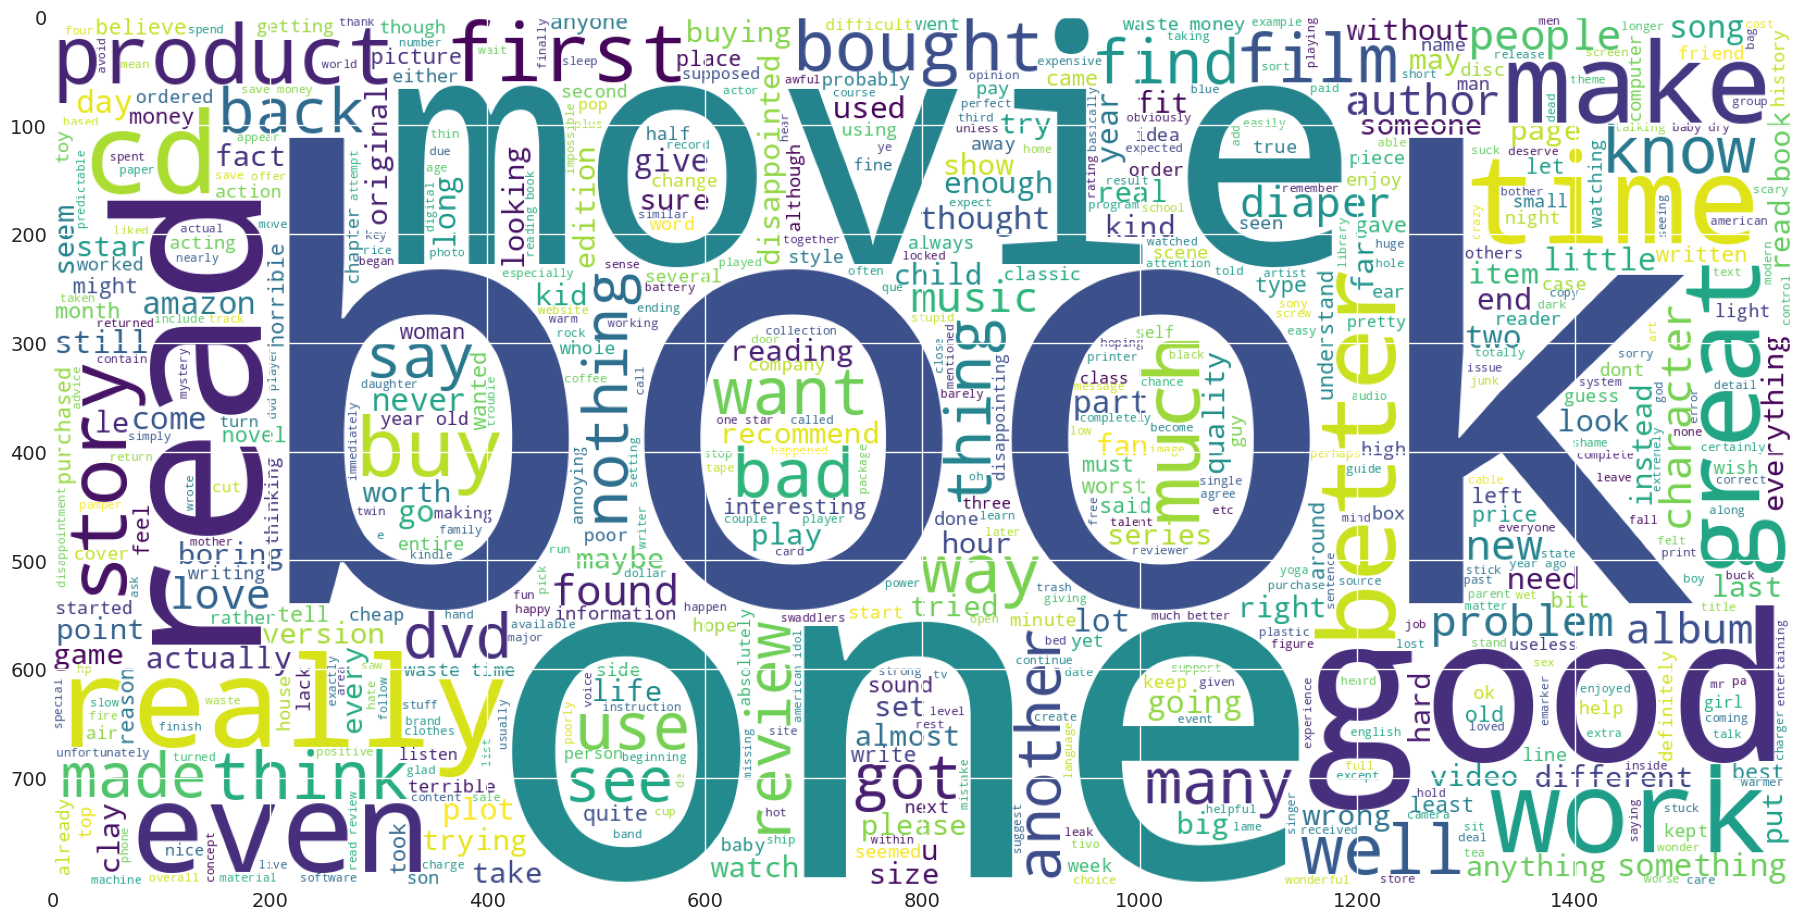

In [90]:
# Negative Review WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600,
               background_color="white").generate(" ".join(df[df["sentiment"]==0].clean_review))
plt.imshow(wc1)

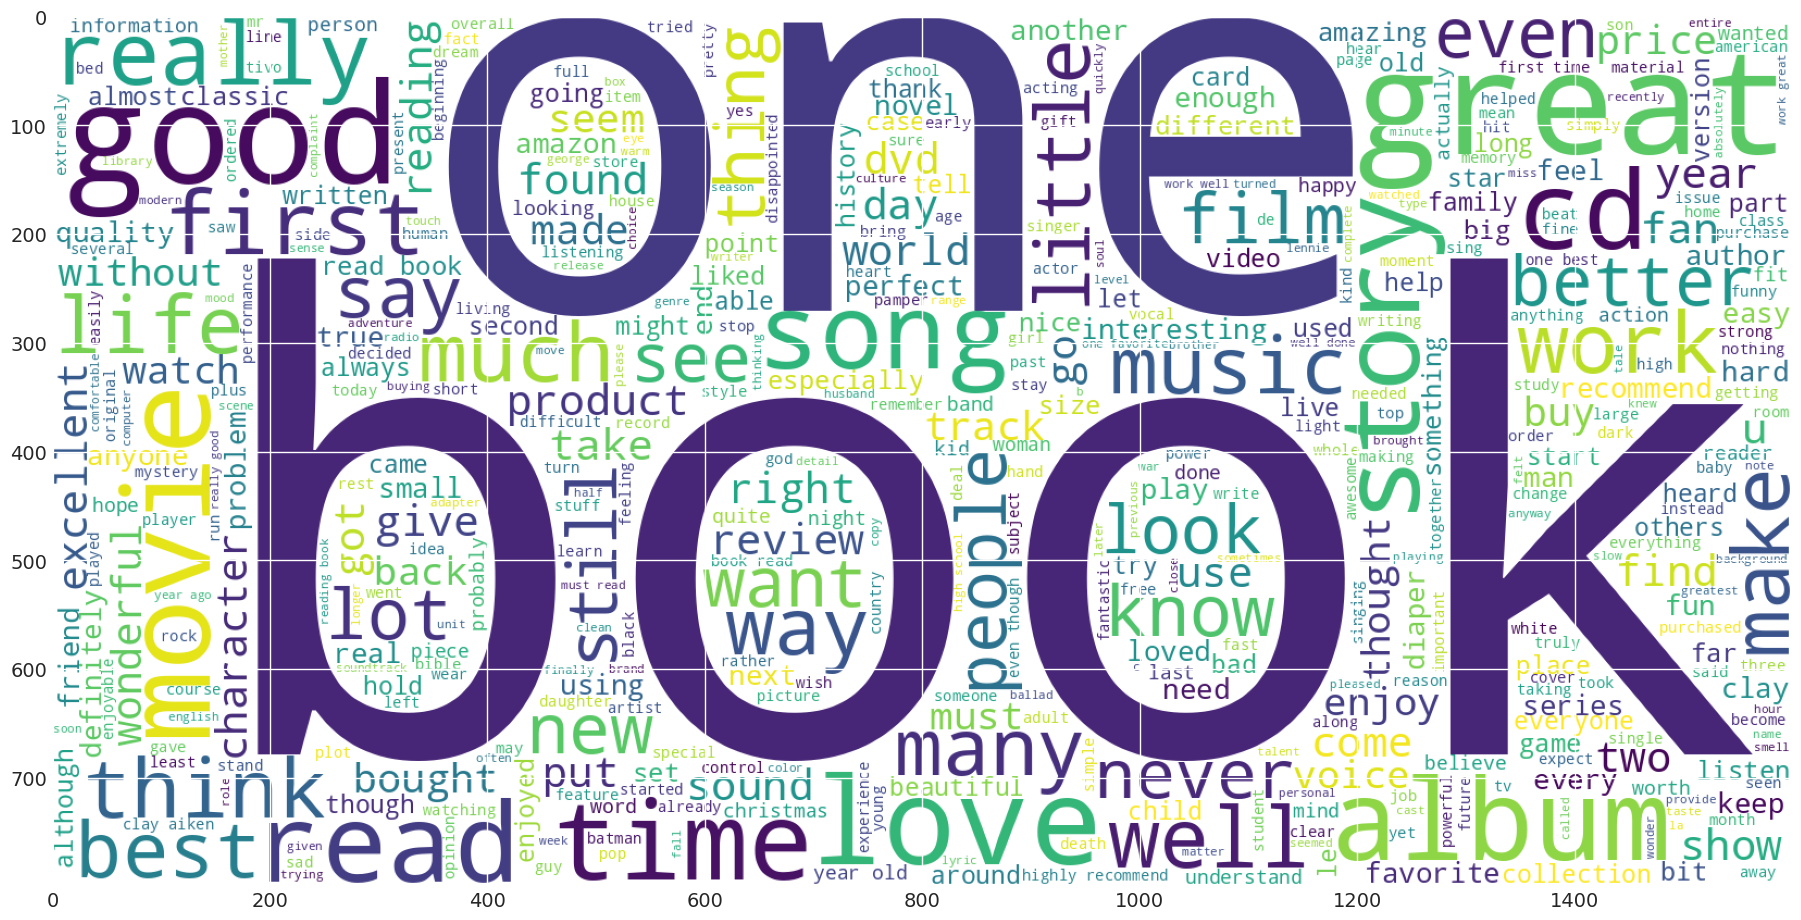

In [91]:
# Positive Review WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600,
               background_color="white").generate(" ".join(df[df["sentiment"]==1].clean_review))
plt.imshow(wc)

In [92]:
df = df1[["sentiment","clean_review"]]
df.head(10)

,sentiment,clean_review
0,1,lovely pat one great voice generation listened...
1,1,despite fact played small portion game music h...
2,0,bought charger jul worked ok design nice conve...
3,1,check maha energy website powerex mh c f charg...
4,1,reviewed quite bit combo player hesitant due u...
5,0,also began incorrect disc problem read vcr sti...
6,0,love style couple year dvd giving problem even...
7,0,cannot scroll dvd menu set vertically triangle...
8,1,exotic tale orient dr shen fu weird tale magaz...
9,0,firstly enjoyed format tone book author addres...


In [93]:
df.sentiment.unique()

array([1, 0])

# model training

In [94]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df["clean_review"]),np.array(df["sentiment"]), test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(1499,)
(500,)


In [95]:
# term frequency inverse document frequency ( TF-IDF )
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tf2 = tfidf2.fit_transform(X_train)
X_test_tf2 = tfidf2.transform(X_test)

## random forest classifier

In [96]:
# fitting ML models
rf = RandomForestClassifier()
rf.fit(X_train_tf2, y_train)

RandomForestClassifier()

In [97]:
from sklearn.metrics import roc_auc_score
y_pred = rf.predict(X_test_tf2)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {acc*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred)}")
print(report)

Accuracy: 75.8% and Roc Auc Score:0.7527597402597402
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       220
           1       0.78      0.80      0.79       280

    accuracy                           0.76       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.76      0.76       500



## XGB classifier

In [98]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(eval_metric="mlogloss")
xgb.fit(X_train_tf2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [99]:
y_pred2 = xgb.predict(X_test_tf2)
acc2 = accuracy_score(y_pred2, y_test)
report2 = classification_report(y_test, y_pred2)
roc2 = roc_auc_score(y_test,y_pred2)
print(f"Accuracy: {acc2*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred2)}")
print(report2)

Accuracy: 72.0% and Roc Auc Score:0.7183441558441559
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       220
           1       0.76      0.73      0.75       280

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



## lgbm classifier

In [100]:
lgb = LGBMClassifier()
lgb.fit(X_train_tf2, y_train)

[LightGBM] [Info] Number of positive: 765, number of negative: 734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8573
[LightGBM] [Info] Number of data points in the train set: 1499, number of used features: 438
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510340 -> initscore=0.041367
[LightGBM] [Info] Start training from score 0.041367


LGBMClassifier()

In [101]:
y_pred_lgb = lgb.predict(X_test_tf2)
acc_lgb = accuracy_score(y_pred_lgb, y_test)
report_lgb = classification_report(y_test, y_pred_lgb)
roc_lgb = roc_auc_score(y_test,y_pred_lgb)
print(f"Accuracy: {acc_lgb*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred_lgb)}")
print(report_lgb)

Accuracy: 71.6% and Roc Auc Score:0.7167207792207791
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       220
           1       0.77      0.71      0.74       280

    accuracy                           0.72       500
   macro avg       0.71      0.72      0.71       500
weighted avg       0.72      0.72      0.72       500



## multinomialNB

In [102]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf2, y_train)

MultinomialNB()

In [103]:
y_pred3 = nb.predict(X_test_tf2)
acc3 = accuracy_score(y_pred3, y_test)
report3 = classification_report(y_test, y_pred3)
roc3 = roc_auc_score(y_test,y_pred3)
print(f"Accuracy: {acc3*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred3)}")
print(report3)

Accuracy: 77.60000000000001% and Roc Auc Score:0.7702922077922076
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       220
           1       0.79      0.82      0.80       280

    accuracy                           0.78       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.78      0.78      0.78       500



## gradient boosting classifier

In [104]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf2, y_train)

GradientBoostingClassifier()

In [105]:
y_pred4 = gb.predict(X_test_tf2)
acc4 = accuracy_score(y_pred4, y_test)
report4 = classification_report(y_test, y_pred4)
roc4 = roc_auc_score(y_test,y_pred4)
print(f"Accuracy: {acc4*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred4)}")
print(report4)

Accuracy: 73.0% and Roc Auc Score:0.7214285714285713
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       220
           1       0.74      0.79      0.77       280

    accuracy                           0.73       500
   macro avg       0.73      0.72      0.72       500
weighted avg       0.73      0.73      0.73       500



## decision trees classifier

In [106]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tf2, y_train)
y_pred5 = dt.predict(X_test_tf2)
acc5 = accuracy_score(y_pred5, y_test)
report5 = classification_report(y_test, y_pred5)
roc5 = roc_auc_score(y_test,y_pred5)
print(f"Accuracy: {acc5*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred5)}")
print(report5)

Accuracy: 65.0% and Roc Auc Score:0.647564935064935
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       220
           1       0.70      0.67      0.68       280

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



## model accuracy, precision, and roc scores

In [107]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred)
ps_lgb = precision_score(y_test,y_pred_lgb)
ps2 = precision_score(y_test, y_pred2)
ps3 = precision_score(y_test, y_pred3)
ps4 = precision_score(y_test, y_pred4)
ps5 = precision_score(y_pred5,y_test)

In [108]:
accuracys = [acc,acc2,acc3,acc4,acc5,acc_lgb]
roc_scores = [roc, roc2, roc3, roc4,roc5, roc_lgb]
precision_scores = [ps,ps2,ps3,ps4,ps5,ps_lgb]
models = {"Random Forest":rf,"XGboost":xgb,"Naive Bayes":nb,"Gradient Boosting":gb,"Decision Tree":dt,"LGB Machine":lgb}

model_df = pd.DataFrame({"Models":models.keys(),"Accuracy":accuracys,"Precision Score":precision_scores,"Roc Scores": roc_scores}).sort_values("Roc Scores",ascending=False)

In [109]:
model_df

,Models,Accuracy,Precision Score,Roc Scores
2,Naive Bayes,0.776,0.789655,0.770292
0,Random Forest,0.758,0.777003,0.752760
3,Gradient Boosting,0.730,0.742475,0.721429
1,XGboost,0.720,0.759259,0.718344
5,LGB Machine,0.716,0.765385,0.716721
4,Decision Tree,0.650,0.667857,0.647565


# Deep Learning
- applying tokenizer for Bi-LSTM input after splitting data into training and testing/validation set

In [110]:
from sklearn.model_selection import train_test_split
X = df["clean_review"]
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train.shape)
display(X_test.shape)

(1499,)

(500,)

In [111]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [112]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [113]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

In [114]:
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         15, 4706, 2035,  452, 2035, 4707,  692,  566,  693, 2035,  337,
         15, 4708, 4709, 4710,  749,  503,  453,   35, 2476, 3180,  468,
        318, 4711, 2477,   21,   14,   26,  367,   61, 2035], dtype=int32)

In [115]:
#import json
# Save the tokenizer configuration to a file
#tokenizer_path = "/kaggle/working/tokenizer_config.json"
#tokenizer_json = tokenizer.to_json()

#with open(tokenizer_path, 'w', encoding='utf-8') as f:
#    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

# Bidirectional LSTM
- structure and parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          630464    
                                                                 
 bidirectional (Bidirection  (None, 200)               132000    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 788321 (3.01 MB)
Trainable params: 788321 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


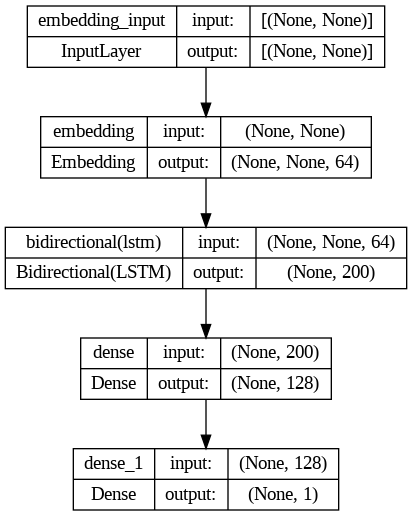

In [117]:
# construct model
BATCH_SIZE = 64

from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [118]:
# Used for preventing ovefitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [119]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
24/24 [==============================] - 19s 397ms/step - loss: 0.6898 - accuracy: 0.5257 - val_loss: 0.6677 - val_accuracy: 0.5760
Epoch 2/15
24/24 [==============================] - 5s 205ms/step - loss: 0.4683 - accuracy: 0.8205 - val_loss: 0.6081 - val_accuracy: 0.6980
Epoch 3/15
24/24 [==============================] - 7s 284ms/step - loss: 0.1247 - accuracy: 0.9586 - val_loss: 0.8390 - val_accuracy: 0.7600
Epoch 4/15
24/24 [==============================] - 5s 209ms/step - loss: 0.0479 - accuracy: 0.9893 - val_loss: 1.0002 - val_accuracy: 0.7420
Epoch 5/15
24/24 [==============================] - 5s 222ms/step - loss: 0.0094 - accuracy: 0.9980 - val_loss: 0.9734 - val_accuracy: 0.7420
Epoch 6/15
24/24 [==============================] - 6s 258ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.0963 - val_accuracy: 0.7480
Epoch 7/15
24/24 [==============================] - 5s 215ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1857 - val_accuracy: 0.7460
Epoch

In [120]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

16/16 [==============================] - 1s 36ms/step
LSTM Recurrent Neural Network baseline: 1.0
LSTM Recurrent Neural Network: 0.8226461038961038


In [121]:
model.evaluate(X_test_seq_padded, y_test)

16/16 [==============================] - 1s 59ms/step - loss: 1.1857 - accuracy: 0.7460


[1.1857240200042725, 0.7459999918937683]

Text(0.5, 1.0, 'Training and Validation Accuracy')

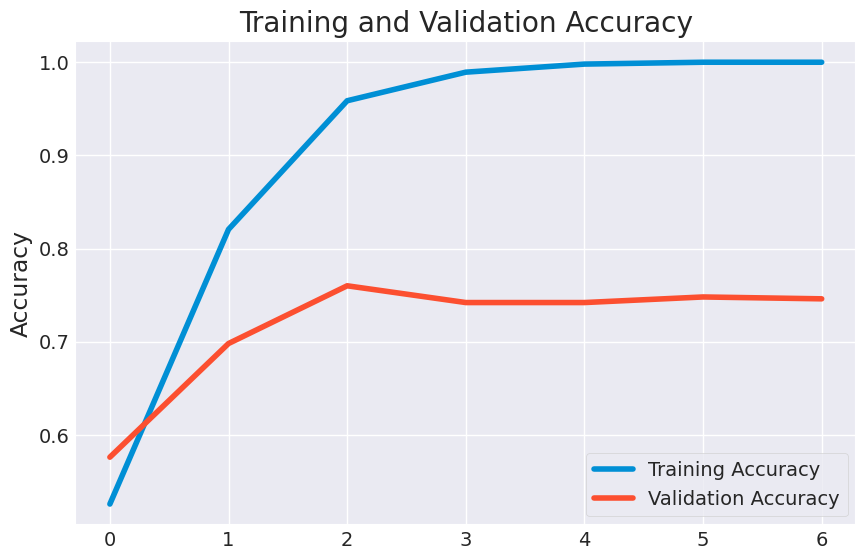

In [122]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

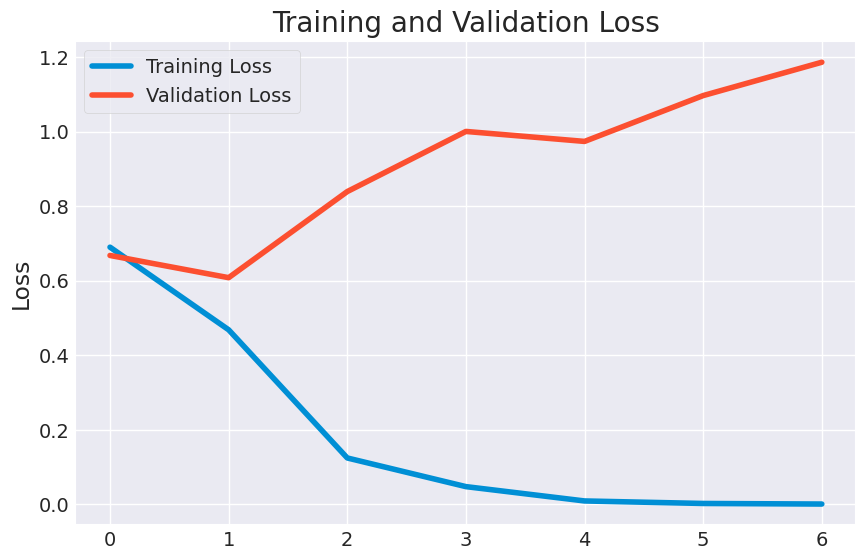

In [123]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

In [124]:
model.save("BiLSTM1.h5")